In [ ]:
# Install the pyecore library if not already installed
!pip install --upgrade pyecore

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
from google.colab import files
from pyecore.resources import ResourceSet, URI
from pyecore.ecore import EAttribute, EReference, EDataType, EClass, EObject
import random

In [ ]:
from pyecore.resources import ResourceSet, URI
from pyecore.ecore import EClass, EAttribute, EReference, EDataType, EPackage

def loadMetamodel(file_name):
    # Load the XML using PyEcore
    resource_set = ResourceSet()
    resource = resource_set.get_resource(URI(file_name))  # Use URI for file loading
    resource.load()  # Load the resource

    model = resource.contents  # This contains the top-level objects

    # Create a dictionary to store class information
    class_info_dict = {}

    # Function to map eType to meaningful names
    def map_etype(etype):
        if etype is None:
            return None

        # اگر نوع داده پراکسی بود، آن را 'EString' در نظر بگیر
        if 'EProxy' in str(etype):
            return 'EString'

        # بررسی سایر موارد
        if isinstance(etype, EDataType):
            if etype.name == 'String':
                return 'EString'
            elif etype.name == 'Int':
                return 'EInt'
        elif isinstance(etype, EClass):
            return etype.name
        elif isinstance(etype, str):
            if "EString" in etype:
                return 'EString'
            elif "EInt" in etype:
                return 'EInt'
        return str(etype)

    # Iterate through the model to extract eClasses and features
    for e_package in model:
        if isinstance(e_package, EPackage):
            for e_classifier in e_package.eClassifiers:
                if isinstance(e_classifier, EClass):
                    if e_classifier.abstract:
                        continue  # Skip abstract classes
                    class_name = e_classifier.name
                    class_info_dict[class_name] = {
                        'attributes': [],
                        'references': []
                    }
                    for feature in e_classifier.eStructuralFeatures:
                        feature_name = feature.name
                        feature_type = map_etype(feature.eType)
                        if isinstance(feature, EAttribute):
                            class_info_dict[class_name]['attributes'].append({
                                'name': feature_name,
                                'type': feature_type
                            })
                        elif isinstance(feature, EReference):
                            target_class = map_etype(feature.eType)
                            class_info_dict[class_name]['references'].append({
                                'name': feature_name,
                                'target': target_class
                            })

                    # Process features from superclasses
                    for super_type in e_classifier.eSuperTypes:
                        for feature in super_type.eStructuralFeatures:
                            feature_name = feature.name
                            feature_type = map_etype(feature.eType)
                            if isinstance(feature, EAttribute):
                                class_info_dict[class_name]['attributes'].append({
                                    'name': feature_name,
                                    'type': feature_type
                                })
                            elif isinstance(feature, EReference):
                                target_class = map_etype(feature.eType)
                                class_info_dict[class_name]['references'].append({
                                    'name': feature_name,
                                    'target': target_class
                                })

    return class_info_dict

# Method to upload a file
print("Upload Source Metamodel:")
uploaded = files.upload()

# Assuming your XML file is named 'file.xml'
file_name = list(uploaded.keys())[0]  # Get the uploaded file name

# load source metamodel
source_metamodel = loadMetamodel(file_name)

print("Upload Target Metamodel:")
uploaded = files.upload()

# Assuming your XML file is named 'file.xml'
file_name = list(uploaded.keys())[0]  # Get the uploaded file name

# load target metamodel
target_metamodel = loadMetamodel(file_name)


def create_source_attributes(class_info_dict):
    source_attributes = {}

    for class_name, info in class_info_dict.items():
        attributes = [attr['name'] for attr in info['attributes']]
        source_attributes[class_name] = attributes

    return source_attributes
def create_target_attributes(target_metamodel):
    target_attributes = {}

    for class_name, info in target_metamodel.items():
        attributes = [attr['name'] for attr in info['attributes']]
        target_attributes[class_name] = attributes

    return target_attributes
def create_source_references(source_metamodel):
    source_references = {}

    for class_name, info in source_metamodel.items():
        references = [ref['name'] for ref in info['references']]
        source_references[class_name] = references

    return source_references
def create_target_references(target_metamodel):
    target_references = {}

    for class_name, info in target_metamodel.items():
        references = [ref['name'] for ref in info['references']]
        target_references[class_name] = references

    return target_references


source_attributes = create_source_attributes(source_metamodel)
source_references = create_source_references(source_metamodel)

target_attributes = create_target_attributes(target_metamodel)
target_references = create_target_references(target_metamodel)

print("This is Source Metamodel:")
for class_name, info in source_metamodel.items():
    print(f'Class: {class_name}')
    print('Attributes:')
    for attr in info['attributes']:
        print(f"  - {attr['name']} (Type: {attr['type']})")
    print('References:')
    for ref in info['references']:
        print(f"  - {ref['name']} (Target: {ref['target']})")

print("This is Target Metamodel:")
for class_name, info in target_metamodel.items():
    print(f'Class: {class_name}')
    print('Attributes:')
    for attr in info['attributes']:
        print(f"  - {attr['name']} (Type: {attr['type']})")
    print('References:')
    for ref in info['references']:
        print(f"  - {ref['name']} (Target: {ref['target']})")


Upload Source Metamodel:


Saving UML.ecore to UML.ecore
Upload Target Metamodel:


Saving Java.ecore to Java.ecore
This is Source Metamodel:
Class: Package
Attributes:
  - name (Type: EString)
References:
  - classifiers (Target: Class)
Class: Class
Attributes:
  - name (Type: EString)
  - ID (Type: EString)
References:
  - attrs (Target: Attribute)
Class: Attribute
Attributes:
  - name (Type: EString)
  - type (Type: EString)
References:
This is Target Metamodel:
Class: Package
Attributes:
  - packageName (Type: EString)
References:
  - classes (Target: Class)
Class: Class
Attributes:
  - className (Type: EString)
  - ID (Type: EString)
References:
  - fields (Target: Field)
Class: Field
Attributes:
  - fieldName (Type: EString)
  - fieldType (Type: EString)
References:


Upload source model:


Saving uml.xmi to uml.xmi
Upload target model:


Saving java.xmi to java.xmi


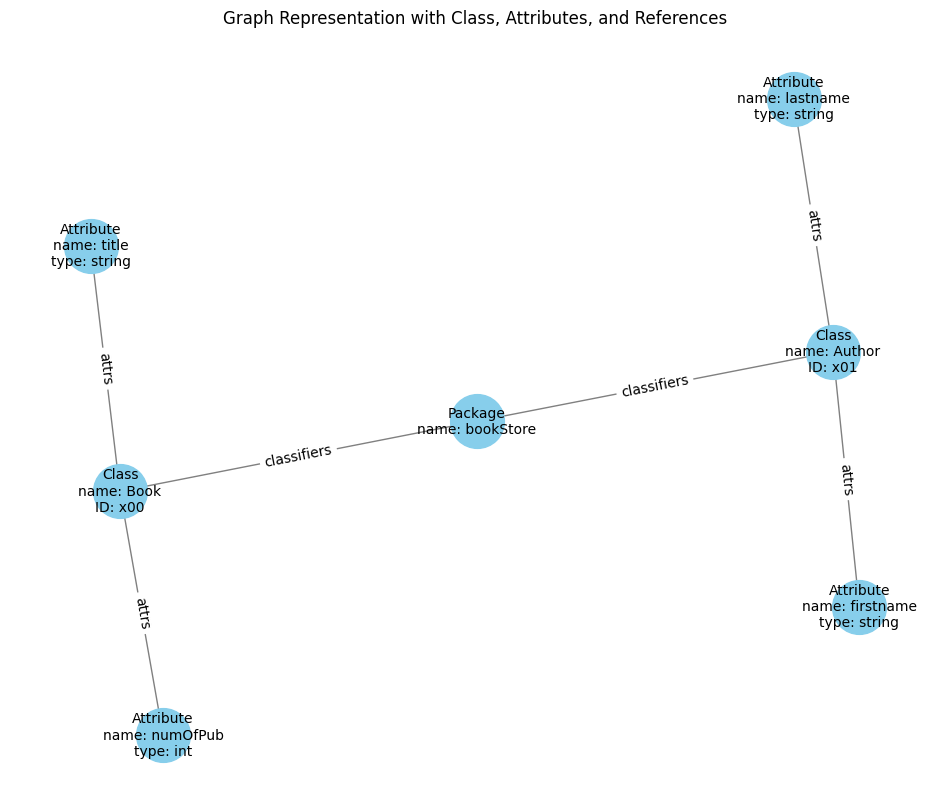

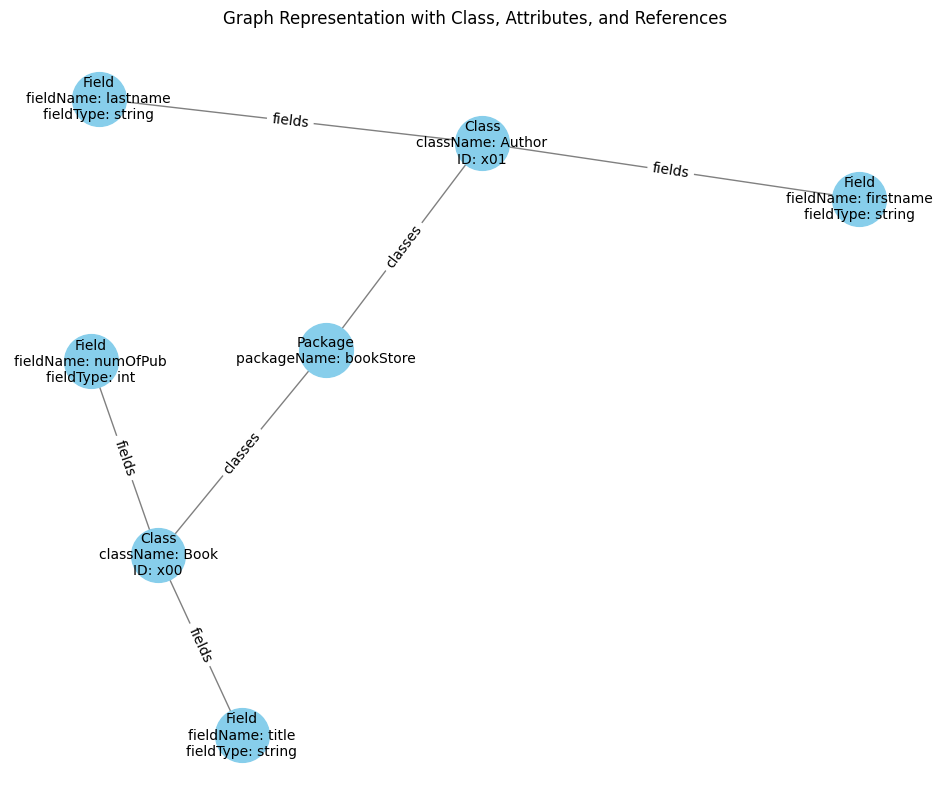

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from lxml import etree
import uuid


def print_stack(stack):
    print("Current stack elements:")
    for elem, parent_elem, parent_label in stack:
        element_name = etree.QName(elem).localname  # دریافت نام عنصر فعلی
        parent_name = etree.QName(parent_elem).localname if parent_elem is not None else 'None'  # دریافت نام والد
        print(f"Element: {element_name}, Parent: {parent_name}, Parent Label: {parent_label}")
# چاپ گره‌های گراف G
def print_graph_nodes(G):
    print("Nodes in the graph:")
    for node, data in G.nodes(data=True):
        print(f"Node: {node}, Data: {data}")

# چاپ یال‌های گراف G
def print_graph_edges(G):
    print("Edges in the graph:")
    for source_node, target_node, data in G.edges(data=True):
        print(f"Edge from {source_node} to {target_node}, Data: {data}")


# تابع برای بررسی رفرنس بودن
def is_reference_func(class_name, class_info_dict):
    for class_info in class_info_dict.values():
        for ref_info in class_info['references']:
            if class_name == ref_info['name']:
                return True, ref_info['target']  # برگشت True و کلاس هدف رفرنس
    return False, None  # در غیر این صورت False برمی‌گرداند

def process_element_iterative(root, class_info_dict, G):
    stack = [(root, None, None)]  # پشته شامل عنصر، والد، و نام نود

    while stack:
        #print_graph_nodes(G)  # برای بررسی وضعیت نودها
        #print_graph_edges(G)  # برای بررسی وضعیت یال‌ها
        element, parent_element, parent_label = stack.pop()  # گرفتن عنصر فعلی، والد و نام نود از پشته
        class_name = etree.QName(element).localname  # دریافت نام کلاس بدون namespace

        # بررسی اینکه آیا class_name یک رفرنس است یا یک کلاس
        is_reference, target_class = is_reference_func(class_name, class_info_dict)

        # اگر یک رفرنس بود، کلاس هدف آن را پردازش می‌کنیم
        if is_reference and target_class in class_info_dict:
            class_info = class_info_dict[target_class]

            # ایجاد یک شناسه منحصربفرد برای هر نود
            unique_id = str(uuid.uuid4())
            node_label = f"{target_class}_{unique_id}"  # ساخت نود یکتا

            # افزودن نود یا بروزرسانی اطلاعات نود
            if node_label not in G.nodes:
                G.add_node(node_label, type='class', id=unique_id)  # ایجاد نود جدید
                attribute_strings = [f"{attr['name']}: {element.get(attr['name'])}" for attr in class_info['attributes'] if element.get(attr['name'])]
                G.nodes[node_label]['label'] = f"{target_class}\n" + "\n".join(attribute_strings)

            if parent_label is not None:
                G.add_edge(parent_label, node_label, label=class_name)  # افزودن یال رفرنس به والد

            parent_label = node_label  # تنظیم کلاس هدف به عنوان والد برای فرزندان
            for child in element:
                stack.append((child, element, parent_label))  # افزودن فرزندان به پشته

        # اگر کلاس است، آن را پردازش می‌کنیم
        elif class_name in class_info_dict:
            class_info = class_info_dict[class_name]

            # ایجاد یک شناسه منحصربفرد برای هر نود
            unique_id = str(uuid.uuid4())
            node_label = f"{class_name}_{unique_id}"  # ساخت نود یکتا

            # افزودن یا بروزرسانی نود و افزودن صفات به نود مناسب
            if node_label not in G.nodes:
                G.add_node(node_label, type='class', id=unique_id)  # ایجاد نود جدید
                attribute_strings = [f"{attr['name']}: {element.get(attr['name'])}" for attr in class_info['attributes'] if element.get(attr['name'])]
                G.nodes[node_label]['label'] = f"{class_name}\n" + "\n".join(attribute_strings)

            if parent_label is not None:
                G.add_edge(parent_label, node_label, label="contains")  # یال به والد

            parent_label = node_label  # تنظیم کلاس فعلی به عنوان والد برای فرزندان
            for child in element:
                stack.append((child, element, parent_label))  # افزودن فرزندان به پشته

    return G

# تابع برای پردازش یک عنصر XML و افزودن آن به گراف با استفاده از حلقه
# تابع اول: ساخت گراف از فایل XML و دیکشنری متامدل
def build_graph_from_xml(file_name, class_info_dict):
    # Parse the XML file using lxml
    tree = etree.parse(file_name)
    root = tree.getroot()

    # Create a directed graph
    G = nx.DiGraph()

    # پردازش عنصر ریشه با استفاده از حلقه
    process_element_iterative(root, class_info_dict, G)

    return G


def draw_graph(G):
    plt.figure(figsize=(12, 10))  # تعیین سایز شکل
    pos = nx.spring_layout(G, k=0.5)  # استفاده از الگوریتم spring برای چیدمان گره‌ها

    # رسم گره‌ها
    nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='skyblue')

    # رسم یال‌ها
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray')

    # اضافه کردن برچسب به گره‌ها
    node_labels = {}
    for node in G.nodes:
        label = G.nodes[node].get('label', node)  # دریافت برچسب اصلی نود
        #node_id = G.nodes[node].get('id', '')  # دریافت شناسه نود
        #if node_id:
         #   short_id = node_id[:8]  # کوتاه کردن شناسه (۸ کاراکتر اول)
          #  label = f"{label}"  # اضافه کردن شناسه کوتاه به برچسب
        node_labels[node] = label

    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_family="sans-serif")

    # اضافه کردن برچسب به یال‌ها (برای نمایش نام رفرنس‌ها)
    edge_labels = nx.get_edge_attributes(G, 'label')  # دریافت برچسب‌های یال‌ها
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # نمایش گراف
    plt.title("Graph Representation with Class, Attributes, and References")
    plt.axis('off')  # حذف محورهای مختصات
    plt.show()

# مثال بارگذاری مدل
print('Upload source model:')
# Method to upload a file
uploaded = files.upload()

# Assuming your XML file is named 'file.xml'
source_file_name = list(uploaded.keys())[0]  # Get the uploaded file name

# سپس گراف را بسازید و رسم کنید
source_Model_Graph = build_graph_from_xml(source_file_name, source_metamodel)

print('Upload target model:')
# Method to upload a file
uploaded = files.upload()

# Assuming your XML file is named 'file.xml'
target_file_name = list(uploaded.keys())[0]  # Get the uploaded file name

# سپس گراف را بسازید و رسم کنید
target_Model_Graph = build_graph_from_xml(target_file_name, target_metamodel)

draw_graph(source_Model_Graph)
draw_graph(target_Model_Graph)


In [ ]:
import random
import networkx as nx

# تابع برای چاپ Q-table
def print_q_table(Q_table, title="Q-table"):
    print(f"\n{title}:")
    for state, actions in Q_table.items():
        print(f"State: {state}")
        for action, value in actions.items():
            print(f"  Action: {action}, Q-value: {value}")
    print("\n")
def update_Q_table(Q_table, state, action, reward, next_state, alpha=0.1, gamma=0.9):
    # بررسی اینکه آیا next_state در Q_table وجود دارد
    if next_state not in Q_table:
        Q_table[next_state] = {action: 0.0 for action in Q_table[state]}  # مقداردهی پیش‌فرض برای اکشن‌های state

    # بررسی اینکه آیا اکشن در وضعیت state وجود دارد
    if action not in Q_table[state]:
        Q_table[state][action] = 0.0  # مقداردهی پیش‌فرض برای اکشن

    # یافتن بهترین اکشن برای حالت بعدی (next_state)
    best_next_action = max(Q_table[next_state], key=Q_table[next_state].get)

    # به‌روزرسانی Q-value برای اکشن در حالت فعلی
    Q_table[state][action] = Q_table[state][action] + alpha * (reward + gamma * Q_table[next_state][best_next_action] - Q_table[state][action])


def graphs_are_equal(graph1, graph2):

    # بررسی برچسب نودها بدون توجه به ID
    labels_in_graph1 = {data.get('label', 'Unknown') for _, data in graph1.nodes(data=True)}
    labels_in_graph2 = {data.get('label', 'Unknown') for _, data in graph2.nodes(data=True)}

    return labels_in_graph1 == labels_in_graph2


# مقایسه مدل‌ها برای محاسبه پاداش
def compare_models(transformed_graph, target_graph):
    reward = 0

    # مقایسه تعداد نودها
    node_difference = abs(len(transformed_graph.nodes) - len(target_graph.nodes))
    if node_difference > 0:
        reward -= node_difference * 2  # جریمه کمتر برای تفاوت در تعداد نودها
    else:
        transformed_labels = {data.get('label', 'Unknown') for _, data in transformed_graph.nodes(data=True)}
        target_labels = {data.get('label', 'Unknown') for _, data in target_graph.nodes(data=True)}

        correct_node_count = 0
        for label in transformed_labels:
            if label in target_labels:
                correct_node_count += 1  # شمارش نودهای صحیح
        reward += correct_node_count * 5  # پاداش به ازای هر نود صحیح

    # مقایسه تعداد یال‌ها
    edge_difference = abs(len(transformed_graph.edges) - len(target_graph.edges))
    if edge_difference > 0:
        reward -= edge_difference * 1  # جریمه کمتر برای تفاوت در تعداد یال‌ها
    else:
        transformed_edges = {(transformed_graph.nodes[u]['label'], transformed_graph.nodes[v]['label'], data.get('label', 'Unknown'))
                             for u, v, data in transformed_graph.edges(data=True)}
        target_edges = {(target_graph.nodes[u]['label'], target_graph.nodes[v]['label'], data.get('label', 'Unknown'))
                        for u, v, data in target_graph.edges(data=True)}

        correct_edge_count = 0
        for edge in transformed_edges:
            if edge in target_edges:
                correct_edge_count += 1  # شمارش یال‌های صحیح
        reward += correct_edge_count * 2  # پاداش به ازای هر یال صحیح

    # اعمال یک پاداش پایه برای هر قسمت از گراف که مشابه است
    structure_similarity = min(len(transformed_graph.nodes), len(target_graph.nodes)) * 0.5
    reward += structure_similarity  # پاداش برای مشابهت ساختار کلی

    # جلوگیری از تبدیل همه پاداش‌ها به منفی: اطمینان از این که reward حداقل صفر بماند
    reward = max(reward, 0)

    return reward

# تابع تبدیل مدل بر اساس نگاشت‌ها
def transform_model_by_parts(source_model_graph, transformation_rules):
    transformed_graph = nx.DiGraph()
    new_node_ids = {}

    # بررسی وجود 'attribute_mappings' و 'reference_mappings'
    if 'attribute_mappings' not in transformation_rules:
        transformation_rules['attribute_mappings'] = {}  # مقداردهی پیش‌فرض خالی
    if 'reference_mappings' not in transformation_rules:
        transformation_rules['reference_mappings'] = {}  # مقداردهی پیش‌فرض خالی

    for node in source_model_graph.nodes:
        node_data = source_model_graph.nodes[node]
        class_name = node_data.get('label', None)  # استفاده از label به جای نام نود که شامل ID است
        if not class_name:
            continue  # اگر نود برچسب نداشت، از حلقه بگذر

        # استخراج نام کلاس از خط اول
        class_name = class_name.split('\n')[0]
        #print(f"Processing node label: {class_name}")

        # نگاشت نام کلاس (جستجو در کلاس‌های مقصد)
        new_class_name = None
        for target_class, source_class in transformation_rules['class_mappings'].items():
            if source_class.strip().lower() == class_name.strip().lower():
                new_class_name = target_class
                break
        if not new_class_name:
            continue  # اگر نگاشت نام کلاس پیدا نشد، ادامه بده

        # نگاشت ویژگی‌ها (attributes)
        mapped_attributes = []

        # ابتدا برچسب نود را بگیریم
        label = node_data.get('label', '')
        # تقسیم label به خطوط
        lines = label.splitlines()
        # خطوط بعدی شامل صفات و مقادیر هستند
        for line in lines[1:]:  # پردازش خطوط بعدی که صفات هستند
            if ':' in line:
                attr_name, attr_value = line.split(':', 1)  # تقسیم هر خط با اولین ':'
                attr_name = attr_name.strip()  # حذف فضای خالی از نام صفت
                attr_value = attr_value.strip()  # حذف فضای خالی از مقدار صفت
                # مقایسه و نگاشت صفات
                new_attr_name = None
                for target_attr, source_attr in transformation_rules['attribute_mappings'].items():
                    if source_attr == f"{class_name}.{attr_name}":  # بررسی نگاشت صفت
                        new_attr_name = target_attr.split('.')[1]  # فقط نام صفت مقصد را بگیر
                        mapped_attributes.append(f"{new_attr_name}: {attr_value}")  # اضافه کردن صفت نگاشت‌شده به لیست
                        break  # وقتی صفت مقصد پیدا شد، از حلقه خارج شو

        # ساخت نود جدید در گراف
        if new_class_name:
            # تولید یک UUID برای id نود جدید
            new_node_id = f"{new_class_name}_{uuid.uuid4()}"
            # ایجاد label نود مشابه با گراف سورس
            label = f"{new_class_name}\n" + "\n".join(mapped_attributes) if mapped_attributes else f"{new_class_name}\n"
            transformed_graph.add_node(new_node_id, type='class', id=str(uuid.uuid4()), label=label)
            new_node_ids[node] = new_node_id  # به روز رسانی دیکشنری شناسه نودها
            #print(f"New transformed node: {label}")

    # اضافه کردن یال‌ها به گراف جدید
    for edge in source_model_graph.edges(data=True):
        source_node, target_node, edge_data = edge
        reference_name = edge_data['label']

        # نگاشت روابط (جستجو در روابط مقصد)
        new_reference_name = None
        for target_ref, source_ref in transformation_rules['reference_mappings'].items():
            source_node_label = source_model_graph.nodes[source_node].get('label')
            if source_ref == f"{source_node_label.split()[0]}.{reference_name}":
                new_reference_name = target_ref.split('.')[1]  # فقط نام رفرنس مقصد را بگیر
                break  # وقتی رفرنس مقصد پیدا شد، از حلقه خارج شو

        if new_reference_name:
            # بررسی وجود نودها در دیکشنری
            if source_node in new_node_ids and target_node in new_node_ids:
                transformed_graph.add_edge(new_node_ids[source_node], new_node_ids[target_node], label=new_reference_name)
                #print(f"Transformed edge from {new_node_ids[source_node]} to {new_node_ids[target_node]} with label {new_reference_name}")
            else:
                # پیام هشدار در صورت نبود نود در دیکشنری
                if source_node not in new_node_ids:
                    print(f"Warning: Source node {source_node} not found in transformed graph")
                if target_node not in new_node_ids:
                    print(f"Warning: Target node {target_node} not found in transformed graph")
        else:
            print(f"Skipped edge from {source_node} to {target_node}, no reference mapping found.")

    return transformed_graph


In [ ]:
def update_Q_tables(Q_table_class, Q_table_attribute, Q_table_reference, reward, alpha, gamma):
    # به‌روزرسانی Q_table_class
    for target_class, source_classes in Q_table_class.items():
        for source_class, Q_value in source_classes.items():
            # محاسبه بهترین Q_value برای حالت بعدی (با فرض این که می‌خواهیم بیشترین مقدار ممکن را پیدا کنیم)
            max_next_Q_value_class = max(source_classes.values())

            # به‌روزرسانی Q_value برای کلاس‌ها
            Q_table_class[target_class][source_class] = Q_value + alpha * (
                reward + gamma * max_next_Q_value_class - Q_value
            )

    # به‌روزرسانی Q_table_attribute
    for target_attr, source_attrs in Q_table_attribute.items():
        for (source_class, source_attr), Q_value in source_attrs.items():
            # محاسبه بهترین Q_value برای حالت بعدی در صفات
            max_next_Q_value_attr = max(source_attrs.values())

            # به‌روزرسانی Q_value برای صفات
            Q_table_attribute[target_attr][(source_class, source_attr)] = Q_value + alpha * (
                reward + gamma * max_next_Q_value_attr - Q_value
            )

    # به‌روزرسانی Q_table_reference
    for target_ref, source_refs in Q_table_reference.items():
        for (source_class, source_ref), Q_value in source_refs.items():
            # محاسبه بهترین Q_value برای حالت بعدی در رفرنس‌ها
            max_next_Q_value_ref = max(source_refs.values())

            # به‌روزرسانی Q_value برای رفرنس‌ها
            Q_table_reference[target_ref][(source_class, source_ref)] = Q_value + alpha * (
                reward + gamma * max_next_Q_value_ref - Q_value
            )


In [ ]:
def update_Q_table_class(Q_table_class, reward, alpha, gamma):
    for target_class, source_classes in Q_table_class.items():
        for source_class, Q_value in source_classes.items():
            # محاسبه بهترین Q_value برای حالت بعدی
            max_next_Q_value_class = max(source_classes.values())

            # به‌روزرسانی Q_value برای کلاس‌ها
            Q_table_class[target_class][source_class] = Q_value + alpha * (
                reward + gamma * max_next_Q_value_class - Q_value
            )

def transform_and_update_Q_table(source_model_graph, class_mappings, target_graph, Q_table_class, alpha=0.01, gamma=0.9, reward_match=1, reward_mismatch=-1):
    total_reward = 0  # مجموع پاداش‌ها
    matching_nodes_count = 0  # شمارش تعداد نودهای با برچسب یکسان

    def get_key_by_value(dictionary, value):
        for key, val in dictionary.items():
            if val == value:
                return key
        return None

    def count_nodes_with_label(graph, label):
        """تعداد نودهایی با یک برچسب خاص در گراف را برمی‌گرداند."""
        return sum(1 for node in graph.nodes if graph.nodes[node]['label'].split('\n')[0] == label)

    for node in source_model_graph.nodes:
        node_data = source_model_graph.nodes[node]
        class_name = node_data.get('label', None)
        if not class_name:
            continue

        # استخراج نام کلاس از خط اول
        class_name = class_name.split('\n')[0]

        # جستجوی نگاشت معکوس (سورس به هدف)
        new_class_name = get_key_by_value(class_mappings, class_name.strip())
        if not new_class_name:
            continue  # اگر نگاشت پیدا نشد، ادامه بده

        # شمارش تعداد نودهای با برچسب مشابه در گراف منبع و گراف هدف
        source_node_count = count_nodes_with_label(source_model_graph, class_name)
        target_node_count = count_nodes_with_label(target_graph, new_class_name)

        # محاسبه پاداش: اگر تعداد نودها برابر بود، پاداش مثبت، در غیر این صورت پاداش منفی
        if source_node_count == target_node_count:
            reward = reward_match  # اگر تعداد نودها برابر باشد، پاداش مثبت
            matching_nodes_count += 1
        else:
            reward = reward_mismatch  # اگر تعداد نودها برابر نباشد، پاداش منفی

        total_reward += reward

        # به‌روزرسانی Q-table بر اساس قانون Q-Learning
        state = f"{new_class_name}"
        if state in Q_table_class:
            chosen_action = class_mappings[state]
            old_value = Q_table_class[state][chosen_action]
            next_max = max(Q_table_class[state].values())  # بیشترین مقدار برای حالت بعدی

            # محاسبه مقدار جدید با استفاده از فرمول Q-Learning
            new_value = old_value + alpha * (reward + gamma * next_max - old_value)
            Q_table_class[state][chosen_action] = new_value

            # چاپ مقادیر برای بررسی
            #print(f"State: {state}, Action: {chosen_action}, Old Value: {old_value}, New Value: {new_value}, Reward: {reward}, Next Max: {next_max}")

    #print(f"Total reward for this transformation: {total_reward}")
    #print(f"Number of matching node classes: {matching_nodes_count}")  # چاپ تعداد نودهای با برچسب یکسان

def generate_class_mappings(source_metamodel, target_metamodel, Q_table_class, epsilon, source_model_graph, target_graph):
    class_mappings = {}  # دیکشنری برای نگاشت کلاس‌ها

    for target_class in target_metamodel.keys():
        if random.random() < epsilon:
            # انتخاب تصادفی از کلاس‌های سورس
            source_class = random.choice(list(source_metamodel.keys()))
        else:
            # انتخاب کلاس بر اساس Q_table
            source_class = max(Q_table_class[target_class], key=Q_table_class[target_class].get)

        # نگاشت کلاس سورس به کلاس هدف
        class_mappings[target_class] = source_class

        # صدا زدن تابع transform_and_update_Q_table برای به‌روزرسانی Q-table
    transform_and_update_Q_table(source_model_graph, class_mappings, target_graph, Q_table_class)

    return class_mappings


In [ ]:
def update_Q_table_attributes(Q_table_attribute, state, action, reward, alpha, gamma):
    if state in Q_table_attribute:
        # محاسبه بهترین Q_value برای حالت بعدی
        max_next_Q_value_attribute = max(Q_table_attribute[state].values())

        # دریافت Q_value قدیمی
        old_value = Q_table_attribute[state][action]

        # به‌روزرسانی Q_value با فرمول Q-Learning
        new_value = old_value + alpha * (reward + gamma * max_next_Q_value_attribute - old_value)
        Q_table_attribute[state][action] = new_value

        # چاپ برای بررسی
        #print(f"State: {state}, Action: {action}, Old Value: {old_value}, Reward: {reward}, Next Max: {max_next_Q_value_attribute}")
        #print(f"New Value for {state} -> {action}: {new_value}")
    else:
        # اگر state در جدول Q وجود ندارد، ایجاد شود
        Q_table_attribute[state] = {action: reward}
        #print(f"Created new entry in Q-table for state: {state}, Action: {action}, with initial reward: {reward}")

def get_key_by_value_for_attr(dictionary, value):
    for key, val in dictionary.items():
        # استخراج نام کلاس و نام صفت از key و val
        key_class, key_attr = key.split('.')
        val_class, val_attr = val.split('.')

        # مقایسه نام کلاس و نام صفت
        if val_class == value[0] and val_attr == value[1]:
            return key_class, key_attr  # بازگرداندن نام کلاس و نام صفت

    return None, None  # اگر تطابقی یافت نشد

def count_attributes_with_label(graph, class_name, label, value=None):
    attribute_count = 0
    for node in graph.nodes:
        node_data = graph.nodes[node]
        label_data = node_data.get('label', None)

        if label_data:
            label_lines = label_data.split('\n')

            # چک کردن نام کلاس در خط اول
            if len(label_lines) > 0:
                node_class_name = label_lines[0].strip()

                if node_class_name == class_name:
                    # اگر نام کلاس تطابق دارد، صفات را بررسی کن
                    attributes_part = label_lines[1:]
                    for attribute_line in attributes_part:
                        attr_name_value = attribute_line.split(':')
                        if len(attr_name_value) == 2:
                            attr_name = attr_name_value[0].strip()
                            attr_value = attr_name_value[1].strip()

                            # اگر مقدار هم داده شده، آن را هم مقایسه کن
                            if attr_name == label and (value is None or attr_value == value):
                                attribute_count += 1

    return attribute_count

def transform_and_update_Q_table_attributes(source_model_graph, attribute_mappings, target_graph, Q_table_attribute, alpha=0.01, gamma=0.9, reward_match=1, reward_mismatch=-1):
    total_reward = 0  # مجموع پاداش‌ها
    matching_attributes_count = 0  # شمارش تعداد صفات با برچسب یکسان

    for node in source_model_graph.nodes:
        node_data = source_model_graph.nodes[node]
        label = node_data.get('label', '')

        if label:
            lines = label.split('\n')
            source_class_name = lines[0].strip()  # خط اول به عنوان نام کلاس از متامدل منبع استفاده می‌شود
            attributes = {}

            # استخراج صفات از خطوط باقی‌مانده
            for line in lines[1:]:
                if ':' in line:  # اگر خط دارای ساختار attr: value باشد
                    attr_name, attr_value = line.split(':', 1)
                    attributes[attr_name.strip()] = attr_value.strip()
                else:
                    attributes = {}  # اگر label موجود نبود، دیکشنری خالی برمی‌گردد

            for attr_name, attr_value in attributes.items():
                # جستجوی نگاشت معکوس (سورس به هدف) و دریافت نام کلاس و نام صفت
                target_class, target_attr_name = get_key_by_value_for_attr(attribute_mappings, (source_class_name, attr_name.strip()))
                #print(f"Target Class: {target_class}, Target Attribute Name: {target_attr_name}")

                if not target_attr_name:
                    continue  # اگر نگاشت پیدا نشد، ادامه بده

                # شمارش تعداد صفات با هم نام و هم مقدار مشابه در گراف منبع و گراف هدف
                source_attr_count = count_attributes_with_label(source_model_graph, source_class_name, attr_name, attr_value)
                target_attr_count = count_attributes_with_label(target_graph, target_class, target_attr_name, attr_value)

                # چاپ تعداد صفات
                #print(f"Source Attribute Count for {attr_name} with value {attr_value}: {source_attr_count}")
                #print(f"Target Attribute Count for {target_attr_name} with value {attr_value}: {target_attr_count}")

                # محاسبه پاداش: اگر تعداد صفات برابر بود، پاداش مثبت، در غیر این صورت پاداش منفی
                if source_attr_count == target_attr_count:
                    reward = reward_match  # اگر تعداد صفات برابر باشد، پاداش مثبت
                    matching_attributes_count += 1
                else:
                    reward = reward_mismatch  # اگر تعداد صفات برابر نباشد، پاداش منفی

                total_reward += reward

                # ایجاد حالت به صورت ترکیبی از نام کلاس و نام صفت متامدل هدف
                state = f"{target_class}.{target_attr_name}"

                # ایجاد عمل به صورت ترکیبی از نام کلاس و نام صفت متامدل منبع
                action = (source_class_name, attr_name.strip())

                # به‌روزرسانی Q-table بر اساس قانون Q-Learning
                update_Q_table_attributes(Q_table_attribute, state, action, reward, alpha, gamma)

    #print(f"Total reward for this transformation: {total_reward}")
    #print(f"Number of matching attributes: {matching_attributes_count}")  # چاپ تعداد صفات با برچسب یکسان

def generate_attribute_mappings(source_attributes, target_attributes, Q_table_attribute, epsilon, source_model_graph, target_graph):
    attribute_mappings = {}  # دیکشنری برای نگاشت صفات

    for target_class, target_attrs in target_attributes.items():
        for target_attr in target_attrs:
            if random.random() < epsilon:
                # انتخاب تصادفی از صفات سورس
                source_class, source_attr = random.choice([
                    (source_class, source_attr)
                    for source_class, source_attrs in source_attributes.items()
                    for source_attr in source_attrs
                ])
            else:
                # انتخاب صفت بر اساس Q_table
                best_mapping = max(Q_table_attribute[f"{target_class}.{target_attr}"],
                                   key=Q_table_attribute[f"{target_class}.{target_attr}"].get)
                source_class, source_attr = best_mapping
            attribute_mappings[f"{target_class}.{target_attr}"] = f"{source_class}.{source_attr}"

        # صدا زدن تابع transform_and_update_Q_table_attributes برای به‌روزرسانی Q-table
    transform_and_update_Q_table_attributes(source_model_graph, attribute_mappings, target_graph, Q_table_attribute)

    return attribute_mappings


In [ ]:
def update_Q_table_references(Q_table_reference, state, action, reward, alpha, gamma):
    if state in Q_table_reference:
        # محاسبه بهترین Q_value برای حالت بعدی
        max_next_Q_value_reference = max(Q_table_reference[state].values())

        # دریافت Q_value قدیمی
        old_value = Q_table_reference[state][action]

        # به‌روزرسانی Q_value با فرمول Q-Learning
        new_value = old_value + alpha * (reward + gamma * max_next_Q_value_reference - old_value)
        Q_table_reference[state][action] = new_value

        # چاپ برای بررسی
        #print(f"State: {state}, Action: {action}, Old Value: {old_value}, Reward: {reward}, Next Max: {max_next_Q_value_reference}")
        #print(f"New Value for {state} -> {action}: {new_value}")
    else:
        # اگر state در جدول Q وجود ندارد، ایجاد شود
        Q_table_reference[state] = {action: reward}
        #print(f"Created new entry in Q-table for state: {state}, Action: {action}, with initial reward: {reward}")
def count_references_with_label(graph, class_name, ref_name):
    reference_count = 0
    for source_node, target_node, data in graph.edges(data=True):
        source_class_label = graph.nodes[source_node]['label'].split('\n')[0].strip()  # نام کلاس از نود سورس
        ref_label = data.get('label', '').strip()  # نام رفرنس روی یال

        if source_class_label == class_name and ref_label == ref_name:
            reference_count += 1  # اگر نام کلاس و رفرنس مطابقت داشت، شمارش افزایش یابد

    return reference_count

def transform_and_update_Q_table_references(source_model_graph, reference_mappings, target_graph, Q_table_reference, alpha=0.01, gamma=0.9, reward_match=1, reward_mismatch=-1):
    total_reward = 0
    matching_references_count = 0

    for source_node, target_node, data in source_model_graph.edges(data=True):
        source_class_name = source_model_graph.nodes[source_node]['label'].split('\n')[0].strip()
        source_ref_name = data.get('label', '').strip()  # رفرنس روی یال نوشته شده است

        # جستجوی نگاشت معکوس و دریافت نام کلاس و رفرنس هدف
        target_class, target_ref_name = get_key_by_value_for_attr(reference_mappings, (source_class_name, source_ref_name))
        if not target_ref_name:
            continue

        # شمارش رفرنس‌ها در سورس و هدف
        source_ref_count = count_references_with_label(source_model_graph, source_class_name, source_ref_name)
        target_ref_count = count_references_with_label(target_graph, target_class, target_ref_name)

        #print(f"Source Reference Count for {source_ref_name}: {source_ref_count}")
        #print(f"Target Reference Count for {target_ref_name}: {target_ref_count}")

        # محاسبه پاداش
        reward = reward_match if source_ref_count == target_ref_count else reward_mismatch
        total_reward += reward

        # حالت و عمل برای رفرنس‌ها
        state = f"{target_class}.{target_ref_name}"
        action = (source_class_name, source_ref_name)

        # به‌روزرسانی Q-table
        update_Q_table_references(Q_table_reference, state, action, reward, alpha, gamma)

    #print(f"Total reward for this transformation: {total_reward}")
    #print(f"Number of matching references: {matching_references_count}")

def generate_reference_mappings(source_references, target_references, Q_table_reference, epsilon, source_model_graph, target_graph):
    reference_mappings = {}

    for target_class, target_refs in target_references.items():
        for target_ref in target_refs:
            if random.random() < epsilon:
                source_class, source_ref = random.choice([
                    (source_class, source_ref)
                    for source_class, source_refs in source_references.items()
                    for source_ref in source_refs
                ])
            else:
                best_mapping = max(Q_table_reference[f"{target_class}.{target_ref}"],
                                   key=Q_table_reference[f"{target_class}.{target_ref}"].get)
                source_class, source_ref = best_mapping

            reference_mappings[f"{target_class}.{target_ref}"] = f"{source_class}.{source_ref}"

    transform_and_update_Q_table_references(source_model_graph, reference_mappings, target_graph, Q_table_reference)
    return reference_mappings


In [ ]:
# حلقه اصلی برای اجرای چندین اپیزود Q-Learning
def q_learning_multiple_episodes(
    source_metamodel, target_metamodel,
    source_graph, target_graph,
    source_attributes, target_attributes,
    source_references, target_references,
    num_episodes=50, epsilon=0.5, alpha=0.1, gamma=0.9
):
    Q_table_class = {
        target_class: {source_class: 0.0 for source_class in source_metamodel.keys()}
        for target_class in target_metamodel.keys()
    }
    Q_table_attribute = {
    f"{target_class}.{target_attr}": {
        (source_class, source_attr): 0.0  # استفاده از تاپل (source_class, source_attr) به عنوان کلید
        for source_class, source_attrs in source_attributes.items()
        for source_attr in source_attrs
    }
    for target_class, target_attrs in target_attributes.items()
    for target_attr in target_attrs}
    Q_table_reference = {
    f"{target_class}.{target_ref}": {
        (source_class, source_ref): 0.0  # استفاده از تاپل (source_class, source_ref) به عنوان کلید
        for source_class, source_refs in source_references.items()
        for source_ref in source_refs
    }
    for target_class, target_refs in target_references.items()
    for target_ref in target_refs}


    transformation_rules = {}  # ایجاد یک دیکشنری برای نگهداری نگاشت‌ها

    for episode in range(num_episodes):
        print(f"\nEpisode {episode + 1}/{num_episodes}")

        # دریافت نگاشت‌های کلاس
        class_mappings = generate_class_mappings(source_metamodel, target_metamodel, Q_table_class, epsilon, source_Model_Graph, target_Model_Graph)


        # نگاشت صفات با استفاده از Q-learning
        attribute_mappings = generate_attribute_mappings(source_attributes, target_attributes, Q_table_attribute, epsilon, source_Model_Graph, target_Model_Graph)
        #generate_random_attribute_mappings(source_attributes, target_attributes, Q_table_attribute, epsilon)

        # نگاشت رفرنس‌ها با استفاده از Q-learning
        reference_mappings = generate_reference_mappings(source_references, target_references, Q_table_reference, epsilon, source_Model_Graph, target_Model_Graph)

        # افزودن نگاشت‌ها به transformation_rules
        transformation_rules = {
            'class_mappings': class_mappings,
            'attribute_mappings': attribute_mappings,
            'reference_mappings': reference_mappings
        }
        print("Transformation Rules after episode:")
        print(transformation_rules)

        # ساخت گراف جدید از روی گراف سورس با استفاده از قوانین تبدیل
        transformed_graph = transform_model_by_parts(source_Model_Graph, transformation_rules)


        # مقایسه گراف تولید شده با گراف هدف
        reward = compare_models(transformed_graph, target_graph)

        # به‌روزرسانی جداول Q بر اساس پاداش
        #update_Q_tables(Q_table_class, Q_table_attribute, Q_table_reference, reward, alpha, gamma)
        if graphs_are_equal(transformed_graph, target_Model_Graph):
          break
        # کاهش تدریجی epsilon برای حرکت از اکتشاف به بهره‌برداری
        epsilon = max(0.01, epsilon * 0.95)#epsilon - min(0.00001,(1/num_episodes))#  # کاهش سریع‌تر epsilon
        print(f"epsilon:{epsilon}")
    return Q_table_class, Q_table_attribute, Q_table_reference, transformation_rules

# مثال استفاده:
# فرض می‌کنیم که متغیرهای زیر از فایل‌ها خوانده شده‌اند و آماده استفاده هستند:
# source_metamodel, target_metamodel,
# source_graph, target_graph,
# source_attributes, target_attributes,
# source_references, target_references

# اجرای چندباره الگوریتم Q-learning
Q_table_class, Q_table_attribute, Q_table_reference, transformation_rules = q_learning_multiple_episodes(
    source_metamodel,
    target_metamodel,
    source_Model_Graph,
    target_Model_Graph,
    source_attributes,
    target_attributes,
    source_references,
    target_references,
    num_episodes=1000,
    epsilon=1,
    alpha=0.1,
    gamma=0.9
)

# چاپ Q-tables پس از اتمام چندین اپیزود
print_q_table(Q_table_class, title="Final Q-table for Class Mappings")
print_q_table(Q_table_attribute, title="Final Q-table for Attribute Mappings")
print_q_table(Q_table_reference, title="Final Q-table for Reference Mappings")

# تابع برای تبدیل مدل بر اساس نگاشت‌ها و Q-learning
transformed_graph = transform_model_by_parts(source_Model_Graph, transformation_rules)

# نمایش گراف تبدیل شده (در صورت نیاز)
#draw_graph(transformed_graph)
print(f"transformation_rules{transformation_rules}")

print_graph_nodes(transformed_graph)
print_graph_edges(transformed_graph)


Episode 1/1000
Transformation Rules after episode:
{'class_mappings': {'Package': 'Package', 'Class': 'Class', 'Field': 'Attribute'}, 'attribute_mappings': {'Package.packageName': 'Class.name', 'Class.className': 'Package.name', 'Class.ID': 'Package.name', 'Field.fieldName': 'Attribute.type', 'Field.fieldType': 'Class.name'}, 'reference_mappings': {'Package.classes': 'Package.classifiers', 'Class.fields': 'Class.attrs'}}
epsilon:0.95

Episode 2/1000
Transformation Rules after episode:
{'class_mappings': {'Package': 'Class', 'Class': 'Class', 'Field': 'Class'}, 'attribute_mappings': {'Package.packageName': 'Class.ID', 'Class.className': 'Package.name', 'Class.ID': 'Package.name', 'Field.fieldName': 'Class.name', 'Field.fieldType': 'Attribute.name'}, 'reference_mappings': {'Package.classes': 'Class.attrs', 'Class.fields': 'Package.classifiers'}}
epsilon:0.9025

Episode 3/1000
Transformation Rules after episode:
{'class_mappings': {'Package': 'Class', 'Class': 'Package', 'Field': 'Packag

بخش تست

In [ ]:
import time
from google.colab import files
from lxml import etree
import networkx as nx

# تابع ساخت گراف از فایل XML و دیکشنری متامدل
def build_graph_from_xml(file_name, class_info_dict):
    tree = etree.parse(file_name)
    root = tree.getroot()
    G = nx.DiGraph()
    process_element_iterative(root, class_info_dict, G)
    return G

# لود فایل XML و ساخت گراف
def load_model_graph(file_description, class_info_dict):
    print(f"Upload {file_description} model:")
    uploaded = files.upload()  # آپلود فایل در کولب
    file_name = list(uploaded.keys())[0]  # دریافت نام فایل آپلود شده
    model_graph = build_graph_from_xml(file_name, class_info_dict)  # ساخت گراف از فایل XML
    return model_graph

# لود گراف مدل سورس
source_Model_Graph = load_model_graph('source', source_metamodel)

# لود گراف مدل تارگت
target_Model_Graph = load_model_graph('target', target_metamodel)

# اندازه‌گیری زمان اجرای تبدیل مدل
start_time = time.time()

# استفاده از transformation_rules برای تبدیل مدل
transformed_graph = transform_model_by_parts(source_Model_Graph, transformation_rules)

end_time = time.time()
elapsed_time = end_time - start_time

# چاپ زمان اجرا
print(f"Time taken for transformation: {elapsed_time:.4f} seconds")

# ارزیابی تبدیل
# بررسی معادل بودن گراف‌ها
if graphs_are_equal(transformed_graph, target_Model_Graph):
    print("The transformed graph is equivalent to the target graph.")
else:
    print("The transformed graph is NOT equivalent to the target graph.")


Upload source model:


Saving uml100.xmi to uml100 (1).xmi
Upload target model:


Saving java100.xmi to java100 (1).xmi
Time taken for transformation: 0.0034 seconds
The transformed graph is equivalent to the target graph.


Streaming output truncated to the last 5000 lines.
epsilon: 0.41712087993322045

Episode 88/1000
Transformation Rules after episode:
{'class_mappings': {'Package': 'Package', 'Class': 'Class', 'Field': 'Attribute'}, 'attribute_mappings': {'Package.packageName': 'Package.name', 'Class.className': 'Class.name', 'Class.ID': 'Class.ID', 'Field.fieldName': 'Attribute.name', 'Field.fieldType': 'Class.ID'}, 'reference_mappings': {'Package.classes': 'Class.attrs', 'Class.fields': 'Class.attrs'}}
Skipped edge from Package_d523b640-07f4-43d8-9a08-27a11901e0c7 to Class_8eacceac-da05-47d9-8f5f-032e2d3355fc, no reference mapping found.
Skipped edge from Package_d523b640-07f4-43d8-9a08-27a11901e0c7 to Class_f1768f2a-576b-47d4-a71f-0a0f9fa17bdf, no reference mapping found.
epsilon: 0.41294967113388825

Episode 89/1000
Transformation Rules after episode:
{'class_mappings': {'Package': 'Attribute', 'Class': 'Class', 'Field': 'Attribute'}, 'attribute_mappings': {'Package.packageName': 'Class.name', 'Cla

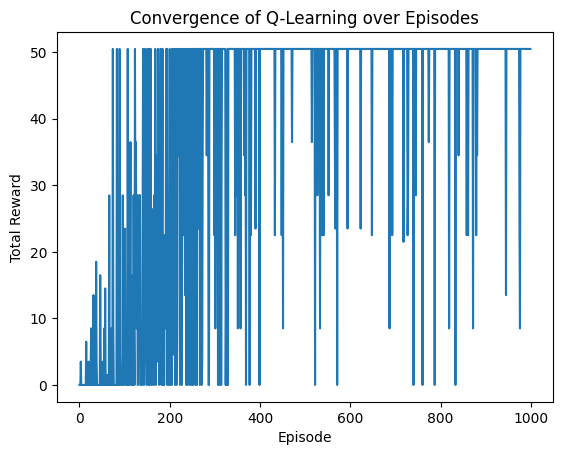


Final Q-table for Class Mappings:
State: Package
  Action: Package, Q-value: 6.060242069638778
  Action: Class, Q-value: -0.0461615615236239
  Action: Attribute, Q-value: -0.10412064476418681
State: Class
  Action: Package, Q-value: -0.04565615423943556
  Action: Class, Q-value: 8.381217237129496
  Action: Attribute, Q-value: 0.3638695760329443
State: Field
  Action: Package, Q-value: -0.022977059181473983
  Action: Class, Q-value: 0.053199913903408474
  Action: Attribute, Q-value: 9.721741878434146



Final Q-table for Attribute Mappings:
State: Package.packageName
  Action: ('Package', 'name'), Q-value: 6.056298368006785
  Action: ('Class', 'name'), Q-value: -0.05134917935592707
  Action: ('Class', 'ID'), Q-value: -0.10186552411891636
  Action: ('Attribute', 'name'), Q-value: -0.20870999188988795
  Action: ('Attribute', 'type'), Q-value: 0.016526993865292952
State: Class.className
  Action: ('Package', 'name'), Q-value: -0.03066431566140443
  Action: ('Class', 'name'), Q-value: 8.36

In [ ]:
import matplotlib.pyplot as plt

# حلقه اصلی برای اجرای چندین اپیزود Q-Learning
def q_learning_multiple_episodes(
    source_metamodel, target_metamodel,
    source_graph, target_graph,
    source_attributes, target_attributes,
    source_references, target_references,
    num_episodes=50, epsilon=0.5, alpha=0.1, gamma=0.9
):
    Q_table_class = {
        target_class: {source_class: 0.0 for source_class in source_metamodel.keys()}
        for target_class in target_metamodel.keys()
    }
    Q_table_attribute = {
        f"{target_class}.{target_attr}": {
            (source_class, source_attr): 0.0  # استفاده از تاپل (source_class, source_attr) به عنوان کلید
            for source_class, source_attrs in source_attributes.items()
            for source_attr in source_attrs
        }
        for target_class, target_attrs in target_attributes.items()
        for target_attr in target_attrs
    }
    Q_table_reference = {
        f"{target_class}.{target_ref}": {
            (source_class, source_ref): 0.0  # استفاده از تاپل (source_class, source_ref) به عنوان کلید
            for source_class, source_refs in source_references.items()
            for source_ref in source_refs
        }
        for target_class, target_refs in target_references.items()
        for target_ref in target_refs
    }

    rewards_per_episode = []  # لیستی برای نگهداری پاداش‌ها در هر اپیزود
    transformation_rules = {}  # ایجاد یک دیکشنری برای نگهداری نگاشت‌ها

    for episode in range(num_episodes):
        print(f"\nEpisode {episode + 1}/{num_episodes}")

        # دریافت نگاشت‌های کلاس
        class_mappings = generate_class_mappings(source_metamodel, target_metamodel, Q_table_class, epsilon, source_Model_Graph, target_Model_Graph)

        # نگاشت صفات با استفاده از Q-learning
        attribute_mappings = generate_attribute_mappings(source_attributes, target_attributes, Q_table_attribute, epsilon, source_Model_Graph, target_Model_Graph)

        # نگاشت رفرنس‌ها با استفاده از Q-learning
        reference_mappings = generate_reference_mappings(source_references, target_references, Q_table_reference, epsilon, source_Model_Graph, target_Model_Graph)

        # افزودن نگاشت‌ها به transformation_rules
        transformation_rules = {
            'class_mappings': class_mappings,
            'attribute_mappings': attribute_mappings,
            'reference_mappings': reference_mappings
        }
        print("Transformation Rules after episode:")
        print(transformation_rules)

        # ساخت گراف جدید از روی گراف سورس با استفاده از قوانین تبدیل
        transformed_graph = transform_model_by_parts(source_Model_Graph, transformation_rules)

        # مقایسه گراف تولید شده با گراف هدف
        reward = compare_models(transformed_graph, target_graph)

        # ثبت پاداش این اپیزود
        rewards_per_episode.append(reward)

        # به‌روزرسانی جداول Q بر اساس پاداش
        #update_Q_tables(Q_table_class, Q_table_attribute, Q_table_reference, reward, alpha, gamma)
        #if graphs_are_equal(transformed_graph, target_Model_Graph):
         #   break

        # کاهش تدریجی epsilon برای حرکت از اکتشاف به بهره‌برداری
        epsilon = max(0.01, epsilon * 0.99)  # کاهش سریع‌تر epsilon
        print(f"epsilon: {epsilon}")

    # چاپ پاداش‌های به‌دست‌آمده در هر اپیزود
    print("Rewards per episode:", rewards_per_episode)

    # رسم نمودار همگرایی
    plt.plot(rewards_per_episode)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Convergence of Q-Learning over Episodes')

    # نمایش نمودار
    plt.show()

    return Q_table_class, Q_table_attribute, Q_table_reference, transformation_rules

# اجرای چندباره الگوریتم Q-learning
Q_table_class, Q_table_attribute, Q_table_reference, transformation_rules = q_learning_multiple_episodes(
    source_metamodel,
    target_metamodel,
    source_Model_Graph,
    target_Model_Graph,
    source_attributes,
    target_attributes,
    source_references,
    target_references,
    num_episodes=1000,
    epsilon=1,
    alpha=0.1,
    gamma=0.9
)

# چاپ Q-tables پس از اتمام چندین اپیزود
print_q_table(Q_table_class, title="Final Q-table for Class Mappings")
print_q_table(Q_table_attribute, title="Final Q-table for Attribute Mappings")
print_q_table(Q_table_reference, title="Final Q-table for Reference Mappings")

# تبدیل مدل بر اساس نگاشت‌ها و Q-learning
transformed_graph = transform_model_by_parts(source_Model_Graph, transformation_rules)

# نمایش گراف تبدیل شده (در صورت نیاز)
# draw_graph(transformed_graph)

print(f"transformation_rules{transformation_rules}")
print_graph_nodes(transformed_graph)
print_graph_edges(transformed_graph)


Streaming output truncated to the last 5000 lines.
State: Package.classes, Action: ('Package', 'classifiers'), Old Value: 8.450933531356299, Reward: 1, Next Max: 8.450933531356299
New Value for Package.classes -> ('Package', 'classifiers'): 8.452482597824941
Source Reference Count for classifiers: 2
Target Reference Count for classes: 2
State: Package.classes, Action: ('Package', 'classifiers'), Old Value: 8.452482597824941, Reward: 1, Next Max: 8.452482597824941
New Value for Package.classes -> ('Package', 'classifiers'): 8.454030115227116
Source Reference Count for attrs: 4
Target Reference Count for fields: 4
State: Class.fields, Action: ('Class', 'attrs'), Old Value: 9.747224650981774, Reward: 1, Next Max: 9.747224650981774
New Value for Class.fields -> ('Class', 'attrs'): 9.747477426330793
Source Reference Count for attrs: 4
Target Reference Count for fields: 4
State: Class.fields, Action: ('Class', 'attrs'), Old Value: 9.747477426330793, Reward: 1, Next Max: 9.747477426330793
New

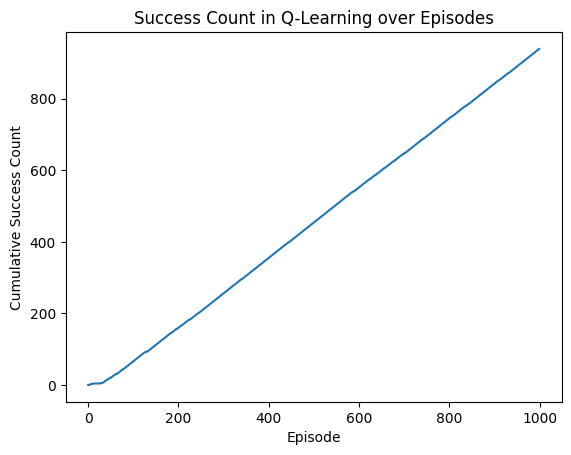

In [ ]:
import matplotlib.pyplot as plt

def q_learning_multiple_episodes_with_improvement(
    source_metamodel, target_metamodel,
    source_graph, target_graph,
    source_attributes, target_attributes,
    source_references, target_references,
    num_episodes=50, epsilon=0.5, alpha=0.1, gamma=0.9
):
    Q_table_class = {
        target_class: {source_class: 0.0 for source_class in source_metamodel.keys()}
        for target_class in target_metamodel.keys()
    }
    Q_table_attribute = {
        f"{target_class}.{target_attr}": {
            (source_class, source_attr): 0.0
            for source_class, source_attrs in source_attributes.items()
            for source_attr in source_attrs
        }
        for target_class, target_attrs in target_attributes.items()
        for target_attr in target_attrs
    }
    Q_table_reference = {
        f"{target_class}.{target_ref}": {
            (source_class, source_ref): 0.0
            for source_class, source_refs in source_references.items()
            for source_ref in source_refs
        }
        for target_class, target_refs in target_references.items()
        for target_ref in target_refs
    }

    transformation_rules = {}
    improvements = []
    prev_reward = None

    for episode in range(num_episodes):
        print(f"\nEpisode {episode + 1}/{num_episodes}")

        # Generate class mappings
        class_mappings = generate_class_mappings(source_metamodel, target_metamodel, Q_table_class, epsilon, source_graph, target_graph)

        # Generate attribute mappings
        attribute_mappings = generate_attribute_mappings(source_attributes, target_attributes, Q_table_attribute, epsilon, source_graph, target_graph)

        # Generate reference mappings
        reference_mappings = generate_reference_mappings(source_references, target_references, Q_table_reference, epsilon, source_graph, target_graph)

        transformation_rules = {
            'class_mappings': class_mappings,
            'attribute_mappings': attribute_mappings,
            'reference_mappings': reference_mappings
        }

        transformed_graph = transform_model_by_parts(source_graph, transformation_rules)

        reward = compare_models(transformed_graph, target_graph)

        # Measure improvement from the previous episode
        if prev_reward is not None:
            improvement = reward - prev_reward
            improvements.append(improvement)
        else:
            improvements.append(0)

        prev_reward = reward

        if graphs_are_equal(transformed_graph, target_graph):
            break

        epsilon = max(0.01, epsilon * 0.95)

    # Plotting improvements
    plt.plot(improvements)
    plt.xlabel('Episode')
    plt.ylabel('Improvement from previous episode')
    plt.title('Improvement in Q-Learning over Episodes')
    plt.show()

    return Q_table_class, Q_table_attribute, Q_table_reference, transformation_rules

def are_graphs_isomorphic(graph1, graph2):
    # فرض بر این است که graph1 و graph2 از نوع networkx.Graph هستند
    return nx.is_isomorphic(graph1, graph2)
def q_learning_multiple_episodes_with_success_count(
    source_metamodel, target_metamodel,
    source_graph, target_graph,
    source_attributes, target_attributes,
    source_references, target_references,
    num_episodes=50, epsilon=0.5, alpha=0.1, gamma=0.9
):
    Q_table_class = {
        target_class: {source_class: 0.0 for source_class in source_metamodel.keys()}
        for target_class in target_metamodel.keys()
    }
    Q_table_attribute = {
        f"{target_class}.{target_attr}": {
            (source_class, source_attr): 0.0
            for source_class, source_attrs in source_attributes.items()
            for source_attr in source_attrs
        }
        for target_class, target_attrs in target_attributes.items()
        for target_attr in target_attrs
    }
    Q_table_reference = {
        f"{target_class}.{target_ref}": {
            (source_class, source_ref): 0.0
            for source_class, source_refs in source_references.items()
            for source_ref in source_refs
        }
        for target_class, target_refs in target_references.items()
        for target_ref in target_refs
    }

    transformation_rules = {}
    success_counts = []
    total_success_count = 0

    for episode in range(num_episodes):
        print(f"\nEpisode {episode + 1}/{num_episodes}")

        # Generate class mappings
        class_mappings = generate_class_mappings(source_metamodel, target_metamodel, Q_table_class, epsilon, source_graph, target_graph)

        # Generate attribute mappings
        attribute_mappings = generate_attribute_mappings(source_attributes, target_attributes, Q_table_attribute, epsilon, source_graph, target_graph)

        # Generate reference mappings
        reference_mappings = generate_reference_mappings(source_references, target_references, Q_table_reference, epsilon, source_graph, target_graph)

        transformation_rules = {
            'class_mappings': class_mappings,
            'attribute_mappings': attribute_mappings,
            'reference_mappings': reference_mappings
        }

        transformed_graph = transform_model_by_parts(source_graph, transformation_rules)

        # Check for success
        if are_graphs_isomorphic(transformed_graph, target_graph):
            total_success_count += 1

        success_counts.append(total_success_count)

        epsilon = max(0.01, epsilon * 0.95)

    # Plotting success counts
    plt.plot(success_counts)
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Success Count')
    plt.title('Success Count in Q-Learning over Episodes')
    plt.show()

    return Q_table_class, Q_table_attribute, Q_table_reference, transformation_rules
# فرض کنید که متغیرهای زیر از فایل‌ها خوانده شده‌اند و آماده استفاده هستند:
# source_metamodel, target_metamodel,
# source_graph, target_graph,
# source_attributes, target_attributes,
# source_references, target_references


# یا اجرای الگوریتم Q-learning برای تعداد تکرارهای موفق
Q_table_class, Q_table_attribute, Q_table_reference, transformation_rules = q_learning_multiple_episodes_with_success_count(
    source_metamodel,
    target_metamodel,
    source_Model_Graph,
    target_Model_Graph,
    source_attributes,
    target_attributes,
    source_references,
    target_references,
    num_episodes=1000,
    epsilon=1,
    alpha=0.1,
    gamma=0.9
)



Episode 1/1000
Skipped edge from Class_bcbe7d0b-c11c-41f4-9912-d6aeb88ba078 to Attribute_30eedaf2-2ddb-44e3-ac59-f476d49d3fa9, no reference mapping found.
Skipped edge from Class_bcbe7d0b-c11c-41f4-9912-d6aeb88ba078 to Attribute_859dfaa5-d135-4912-ab38-c07cf2b36413, no reference mapping found.
Skipped edge from Class_acf478b5-a2e2-465f-a4fa-112013c7c0df to Attribute_9761771b-667b-4c2f-948a-c464611a9ffe, no reference mapping found.
Skipped edge from Class_acf478b5-a2e2-465f-a4fa-112013c7c0df to Attribute_9af1362e-8050-4011-bdfe-75adfe22f002, no reference mapping found.
Failure in episode 1
average success:0.0

Episode 2/1000
Skipped edge from Class_bcbe7d0b-c11c-41f4-9912-d6aeb88ba078 to Attribute_30eedaf2-2ddb-44e3-ac59-f476d49d3fa9, no reference mapping found.
Skipped edge from Class_bcbe7d0b-c11c-41f4-9912-d6aeb88ba078 to Attribute_859dfaa5-d135-4912-ab38-c07cf2b36413, no reference mapping found.
Skipped edge from Class_acf478b5-a2e2-465f-a4fa-112013c7c0df to Attribute_9761771b-667b

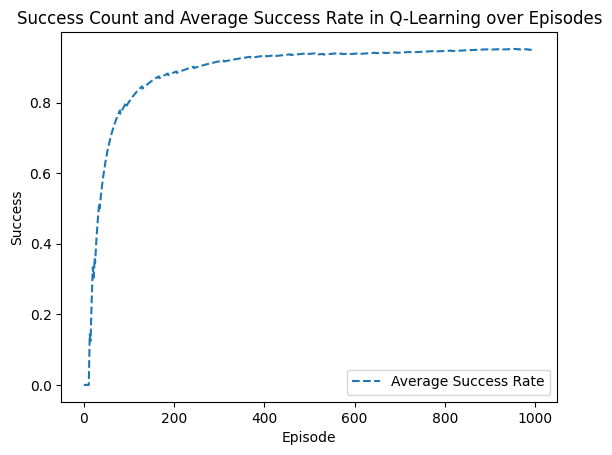

In [ ]:
import matplotlib.pyplot as plt

def q_learning_multiple_episodes_with_success_count(
    source_metamodel, target_metamodel,
    source_graph, target_graph,
    source_attributes, target_attributes,
    source_references, target_references,
    num_episodes=50, epsilon=0.5, alpha=0.1, gamma=0.9
):
    Q_table_class = {
        target_class: {source_class: 0.0 for source_class in source_metamodel.keys()}
        for target_class in target_metamodel.keys()
    }
    Q_table_attribute = {
        f"{target_class}.{target_attr}": {
            (source_class, source_attr): 0.0
            for source_class, source_attrs in source_attributes.items()
            for source_attr in source_attrs
        }
        for target_class, target_attrs in target_attributes.items()
        for target_attr in target_attrs
    }
    Q_table_reference = {
        f"{target_class}.{target_ref}": {
            (source_class, source_ref): 0.0
            for source_class, source_refs in source_references.items()
            for source_ref in source_refs
        }
        for target_class, target_refs in target_references.items()
        for target_ref in target_refs
    }

    transformation_rules = {}
    success_counts = []
    total_success_count = 0
    avg_success_rate = []  # لیست میانگین موفقیت‌ها

    for episode in range(num_episodes):
        print(f"\nEpisode {episode + 1}/{num_episodes}")

        # Generate class mappings
        class_mappings = generate_class_mappings(source_metamodel, target_metamodel, Q_table_class, epsilon, source_graph, target_graph)

        # Generate attribute mappings
        attribute_mappings = generate_attribute_mappings(source_attributes, target_attributes, Q_table_attribute, epsilon, source_graph, target_graph)

        # Generate reference mappings
        reference_mappings = generate_reference_mappings(source_references, target_references, Q_table_reference, epsilon, source_graph, target_graph)

        transformation_rules = {
            'class_mappings': class_mappings,
            'attribute_mappings': attribute_mappings,
            'reference_mappings': reference_mappings
        }

        transformed_graph = transform_model_by_parts(source_graph, transformation_rules)

        # Check for success
        if are_graphs_isomorphic(transformed_graph, target_graph):
          total_success_count += 1
          print(f"Success in episode {episode + 1}")
        else:
          print(f"Failure in episode {episode + 1}")

        success_counts.append(total_success_count)

        # محاسبه و ثبت میانگین موفقیت تا این اپیزود
        avg_success = total_success_count / (episode + 1)
        avg_success_rate.append(avg_success)
        print(f"average success:{avg_success}")
        epsilon = max(0.01, epsilon * 0.9)

    # Plotting success counts
    #plt.plot(success_counts, label="Cumulative Success Count")
    plt.plot(avg_success_rate, label="Average Success Rate", linestyle='--')
    plt.xlabel('Episode')
    plt.ylabel('Success')
    plt.title('Success Count and Average Success Rate in Q-Learning over Episodes')
    plt.legend()

    plt.show()

    return Q_table_class, Q_table_attribute, Q_table_reference, transformation_rules

# فرض کنید که متغیرهای زیر از فایل‌ها خوانده شده‌اند و آماده استفاده هستند:
# source_metamodel, target_metamodel,
# source_graph, target_graph,
# source_attributes, target_attributes,
# source_references, target_references

# اجرای الگوریتم Q-learning برای تعداد تکرارهای موفق و محاسبه میانگین موفقیت‌ها
Q_table_class, Q_table_attribute, Q_table_reference, transformation_rules = q_learning_multiple_episodes_with_success_count(
    source_metamodel,
    target_metamodel,
    source_Model_Graph,
    target_Model_Graph,
    source_attributes,
    target_attributes,
    source_references,
    target_references,
    num_episodes=1000,
    epsilon=1,
    alpha=0.1,
    gamma=0.9
)


Streaming output truncated to the last 5000 lines.
epsilon: 0.4342313267918117

Episode 84/1000
Transformation Rules after episode:
{'class_mappings': {'Package': 'Class', 'Class': 'Class', 'Field': 'Attribute'}, 'attribute_mappings': {'Package.packageName': 'Package.name', 'Class.className': 'Attribute.type', 'Class.ID': 'Class.ID', 'Field.fieldName': 'Attribute.name', 'Field.fieldType': 'Attribute.type'}, 'reference_mappings': {'Package.classes': 'Class.attrs', 'Class.fields': 'Class.attrs'}}
Skipped edge from Package_aa2a3d34-a09d-4e3a-8e19-47ff1c7cb9a2 to Class_bcbe7d0b-c11c-41f4-9912-d6aeb88ba078, no reference mapping found.
Skipped edge from Package_aa2a3d34-a09d-4e3a-8e19-47ff1c7cb9a2 to Class_acf478b5-a2e2-465f-a4fa-112013c7c0df, no reference mapping found.
epsilon: 0.4298890135238936

Episode 85/1000
Transformation Rules after episode:
{'class_mappings': {'Package': 'Class', 'Class': 'Class', 'Field': 'Attribute'}, 'attribute_mappings': {'Package.packageName': 'Package.name', 

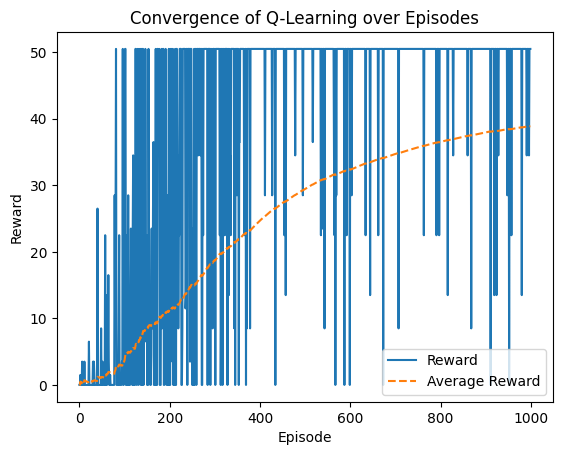


Final Q-table for Class Mappings:
State: Package
  Action: Package, Q-value: 6.044443561404759
  Action: Class, Q-value: -0.1434988820725277
  Action: Attribute, Q-value: 0.027160996533078772
State: Class
  Action: Package, Q-value: -0.007647412078433351
  Action: Class, Q-value: 8.381217237129496
  Action: Attribute, Q-value: 0.9981861064441813
State: Field
  Action: Package, Q-value: -0.05755596941666628
  Action: Class, Q-value: -0.09316603850936352
  Action: Attribute, Q-value: 9.713836539693236



Final Q-table for Attribute Mappings:
State: Package.packageName
  Action: ('Package', 'name'), Q-value: 6.012656233888962
  Action: ('Class', 'name'), Q-value: -0.1380361053965826
  Action: ('Class', 'ID'), Q-value: -0.10666642707995418
  Action: ('Attribute', 'name'), Q-value: 0.03336940239474217
  Action: ('Attribute', 'type'), Q-value: 0.33442587029930876
State: Class.className
  Action: ('Package', 'name'), Q-value: -0.027096203694205713
  Action: ('Class', 'name'), Q-value: 8.3616

In [ ]:
import matplotlib.pyplot as plt

# حلقه اصلی برای اجرای چندین اپیزود Q-Learning
def q_learning_multiple_episodes(
    source_metamodel, target_metamodel,
    source_graph, target_graph,
    source_attributes, target_attributes,
    source_references, target_references,
    num_episodes=50, epsilon=0.5, alpha=0.1, gamma=0.9
):
    Q_table_class = {
        target_class: {source_class: 0.0 for source_class in source_metamodel.keys()}
        for target_class in target_metamodel.keys()
    }
    Q_table_attribute = {
        f"{target_class}.{target_attr}": {
            (source_class, source_attr): 0.0  # استفاده از تاپل (source_class, source_attr) به عنوان کلید
            for source_class, source_attrs in source_attributes.items()
            for source_attr in source_attrs
        }
        for target_class, target_attrs in target_attributes.items()
        for target_attr in target_attrs
    }
    Q_table_reference = {
        f"{target_class}.{target_ref}": {
            (source_class, source_ref): 0.0  # استفاده از تاپل (source_class, source_ref) به عنوان کلید
            for source_class, source_refs in source_references.items()
            for source_ref in source_refs
        }
        for target_class, target_refs in target_references.items()
        for target_ref in target_refs
    }

    rewards_per_episode = []  # لیستی برای نگهداری پاداش‌ها در هر اپیزود
    avg_rewards_per_episode = []  # لیستی برای میانگین پاداش‌ها
    transformation_rules = {}  # ایجاد یک دیکشنری برای نگهداری نگاشت‌ها

    for episode in range(num_episodes):
        print(f"\nEpisode {episode + 1}/{num_episodes}")

        # دریافت نگاشت‌های کلاس
        class_mappings = generate_class_mappings(source_metamodel, target_metamodel, Q_table_class, epsilon, source_Model_Graph, target_Model_Graph)

        # نگاشت صفات با استفاده از Q-learning
        attribute_mappings = generate_attribute_mappings(source_attributes, target_attributes, Q_table_attribute, epsilon, source_Model_Graph, target_Model_Graph)

        # نگاشت رفرنس‌ها با استفاده از Q-learning
        reference_mappings = generate_reference_mappings(source_references, target_references, Q_table_reference, epsilon, source_Model_Graph, target_Model_Graph)

        # افزودن نگاشت‌ها به transformation_rules
        transformation_rules = {
            'class_mappings': class_mappings,
            'attribute_mappings': attribute_mappings,
            'reference_mappings': reference_mappings
        }
        print("Transformation Rules after episode:")
        print(transformation_rules)

        # ساخت گراف جدید از روی گراف سورس با استفاده از قوانین تبدیل
        transformed_graph = transform_model_by_parts(source_Model_Graph, transformation_rules)

        # مقایسه گراف تولید شده با گراف هدف
        reward = compare_models(transformed_graph, target_graph)

        # ثبت پاداش این اپیزود
        rewards_per_episode.append(reward)

        # محاسبه و ثبت میانگین پاداش‌ها تا این اپیزود
        avg_reward = sum(rewards_per_episode) / (episode + 1)
        avg_rewards_per_episode.append(avg_reward)

        # به‌روزرسانی جداول Q بر اساس پاداش
        #update_Q_tables(Q_table_class, Q_table_attribute, Q_table_reference, reward, alpha, gamma)

        # کاهش تدریجی epsilon برای حرکت از اکتشاف به بهره‌برداری
        epsilon = max(0.01, epsilon * 0.99)  # کاهش سریع‌تر epsilon
        print(f"epsilon: {epsilon}")

    # چاپ پاداش‌های به‌دست‌آمده در هر اپیزود
    print("Rewards per episode:", rewards_per_episode)

    # چاپ میانگین پاداش‌های به‌دست‌آمده در هر اپیزود
    print("Average rewards per episode:", avg_rewards_per_episode)

    # رسم نمودار همگرایی پاداش
    plt.plot(rewards_per_episode, label="Reward")
    plt.plot(avg_rewards_per_episode, label="Average Reward", linestyle='--')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Convergence of Q-Learning over Episodes')
    plt.legend()

    # نمایش نمودار
    plt.show()

    return Q_table_class, Q_table_attribute, Q_table_reference, transformation_rules

# اجرای چندباره الگوریتم Q-learning
Q_table_class, Q_table_attribute, Q_table_reference, transformation_rules = q_learning_multiple_episodes(
    source_metamodel,
    target_metamodel,
    source_Model_Graph,
    target_Model_Graph,
    source_attributes,
    target_attributes,
    source_references,
    target_references,
    num_episodes=1000,
    epsilon=1,
    alpha=0.1,
    gamma=0.9
)

# چاپ Q-tables پس از اتمام چندین اپیزود
print_q_table(Q_table_class, title="Final Q-table for Class Mappings")
print_q_table(Q_table_attribute, title="Final Q-table for Attribute Mappings")
print_q_table(Q_table_reference, title="Final Q-table for Reference Mappings")

# تبدیل مدل بر اساس نگاشت‌ها و Q-learning
transformed_graph = transform_model_by_parts(source_Model_Graph, transformation_rules)

# نمایش گراف تبدیل شده (در صورت نیاز)
# draw_graph(transformed_graph)

print(f"transformation_rules{transformation_rules}")
print_graph_nodes(transformed_graph)
print_graph_edges(transformed_graph)
